In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import h5py
import time

## Generating Data

In [2]:
highest_coeff = 15
zernike_bound = 150e-9

nEx = 10000 #number of examples to simulate
nCoeffs = highest_coeff - 1 #no piston

wfe_array = np.zeros((nCoeffs,nEx))
choices = np.random.randint(nCoeffs,size=(nEx,))
displacements = np.random.uniform(low=-1*zernike_bound,high=zernike_bound,size=(nEx,))

#print(wfe_array[choices,:])# = displacements
for i in range(nEx):
    choice = choices[i]
    wfe_array[choice,i] = displacements[i]


print(wfe_array.shape)
print(wfe_array[:,:3])

(14, 10000)
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-4.19361578e-08  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -5.46586594e-08 -1.67737057e-08]]


In [3]:
file_out = 'hdf5_test_file_2.hdf5'
#size of output images is npix_detector
# oversample pads the pupil plane before performing ffts. This gives more accurate simulations of 
# image plane interactions. oversample=2 is generally too low for this application. 
# oversample=4 works well and doesn't take too long (see notebook'Oversample Comparison')
# 'coronagraph' can be 'vortex' or 'fqpm'. See 'Test Responses' notebook for more info.

oversample = 4
wavelength=632e-9*u.m
coronagraph='vortex'
npix_pupil = 512
npix_detector = 256
detector_fov = 0.3 #arcsec
pixelscale = detector_fov/npix_detector
sensor_defocus = 4
obscuration = False
vortex_charge=2


In [4]:
images = np.random.rand(npix_detector,npix_detector,nEx)

## Write Data

In [5]:
hf = h5py.File(file_out, "w",) #create an hdf5 file to store everything chunk_cache_mem_size=1024**2*3000
hf.create_dataset("zernike_coeffs", data=wfe_array)
chunk_shape = (256,256,1)
images_dataset = hf.create_dataset("images",images.shape,'f',chunks=chunk_shape) #create an empty dataset
metadata = {'Date': time.asctime(),
            'Author': 'Greg Allan',
            'oversample': oversample,
            'wavelength': wavelength,
            'coronagraph': coronagraph,
            'npix_pupil': npix_pupil,
            'npix_detector': npix_detector,
            'vortex_charge': vortex_charge,
            'pixelscale': pixelscale,
            'sensor_defocus': sensor_defocus,
            'obscuration': obscuration}
for i in range(nEx):
    images_dataset[:,:,i]=images[:,:,i] #simulate generating the data one by one
    
hf.attrs.update(metadata)
hf.close()

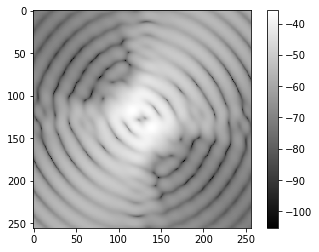

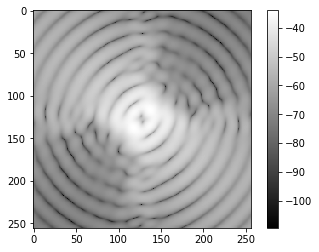

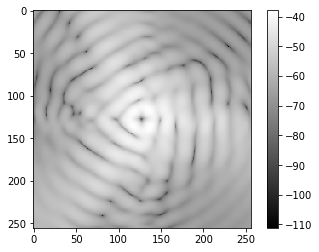

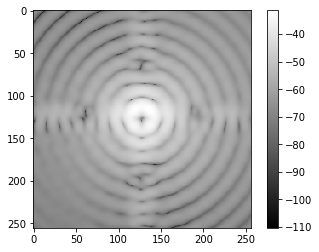

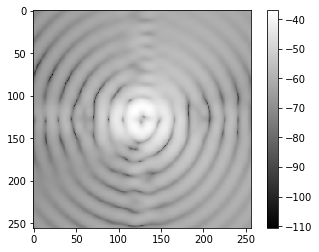

In [13]:
for i in range(5):
    plt.figure()
    plt.imshow(10*np.log10(images[:,:,i]),cmap='gray')
    plt.colorbar()